# **Import Libiraries**

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=3)
#model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, callbacks=[early_stopping])

# **Apple Historical Stock Prices**

In [ ]:
aapl = yf.download ('AAPL' , start = '2015-01-01', end = '2023-12-31')
#aapl.to_csv("data.csv")
aapl.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.373960,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.687307,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.689531,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.021715,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,24.944687,237458000


# **Statistical Analysis**

In [ ]:
aapl.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000,2.264000e+03
mean,83.956509,84.876609,83.092088,84.026440,81.852794,1.237607e+08
std,55.979856,56.611354,55.396020,56.034699,56.305992,6.818458e+07
min,22.500000,22.917500,22.367500,22.584999,20.720034,2.404830e+07
25%,35.452501,35.651249,35.243749,35.439376,32.999378,7.831732e+07
50%,54.039999,54.740000,53.270000,53.868752,51.509119,1.056556e+08
75%,141.444996,143.274998,139.239998,141.710003,139.800018,1.486811e+08
max,198.020004,199.619995,197.000000,198.110001,197.361084,6.488252e+08


In [ ]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2015-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2264 non-null   float64
 1   High       2264 non-null   float64
 2   Low        2264 non-null   float64
 3   Close      2264 non-null   float64
 4   Adj Close  2264 non-null   float64
 5   Volume     2264 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 123.8 KB


In [ ]:
aapl.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
aapl.shape

(2264, 6)

# **Prepare Data**

In [ ]:
# Normalize Data uning MinMaxScaler method
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(aapl['Close'].values.reshape(-1,1))
# Determine days used for prediction
pred_days = 100
x_train = []
y_train = []
for x in range(pred_days, len(scaled_data)):
  x_train.append(scaled_data[x-pred_days:x,0])
  y_train.append(scaled_data[x,0])

# Convert to NumPy arrays
x_train , y_train = np.array(x_train) , np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))



# **Spilit Data to train and Validation**

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=42)

# **Build The Model**

In [ ]:
model = Sequential()
model.add(LSTM(units=30, return_sequences=True , input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50 ))
model.add(Dropout(0.2))
model.add(Dense(units =1))

model.compile(optimizer="adam", loss = "mean_squared_error")
#model.fit(x_train , y_train , epochs= 30 )
#history = model.fit(x_train, y_train, epochs=35, validation_data=(x_val, y_val))
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=15)

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=54,  callbacks=[early_stopping, ])
#model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=30, callbacks=[early_stopping])

Epoch 1/54
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 152ms/step - loss: 0.0475 - val_loss: 0.0011
Epoch 2/54
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - loss: 0.0034 - val_loss: 9.8967e-04
Epoch 3/54
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - loss: 0.0032 - val_loss: 0.0019
Epoch 4/54
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - loss: 0.0033 - val_loss: 0.0019
Epoch 5/54
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 126ms/step - loss: 0.0031 - val_loss: 0.0012
Epoch 6/54
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 142ms/step - loss: 0.0027 - val_loss: 7.4765e-04
Epoch 7/54
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - loss: 0.0023 - val_loss: 8.0354e-04
Epoch 8/54
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - loss: 0.0027 - val_loss: 7.2377e-04
Epoch 9/54
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - loss: 0.0026 - val_loss: 7.1837e-04
Epoch 10/54
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - loss: 0.0025 - val_loss: 6.6434e-04
Epoch 11/54
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - loss: 0.0028 - val_loss: 0.0015
Epoch 12/54
58/58 ━━━

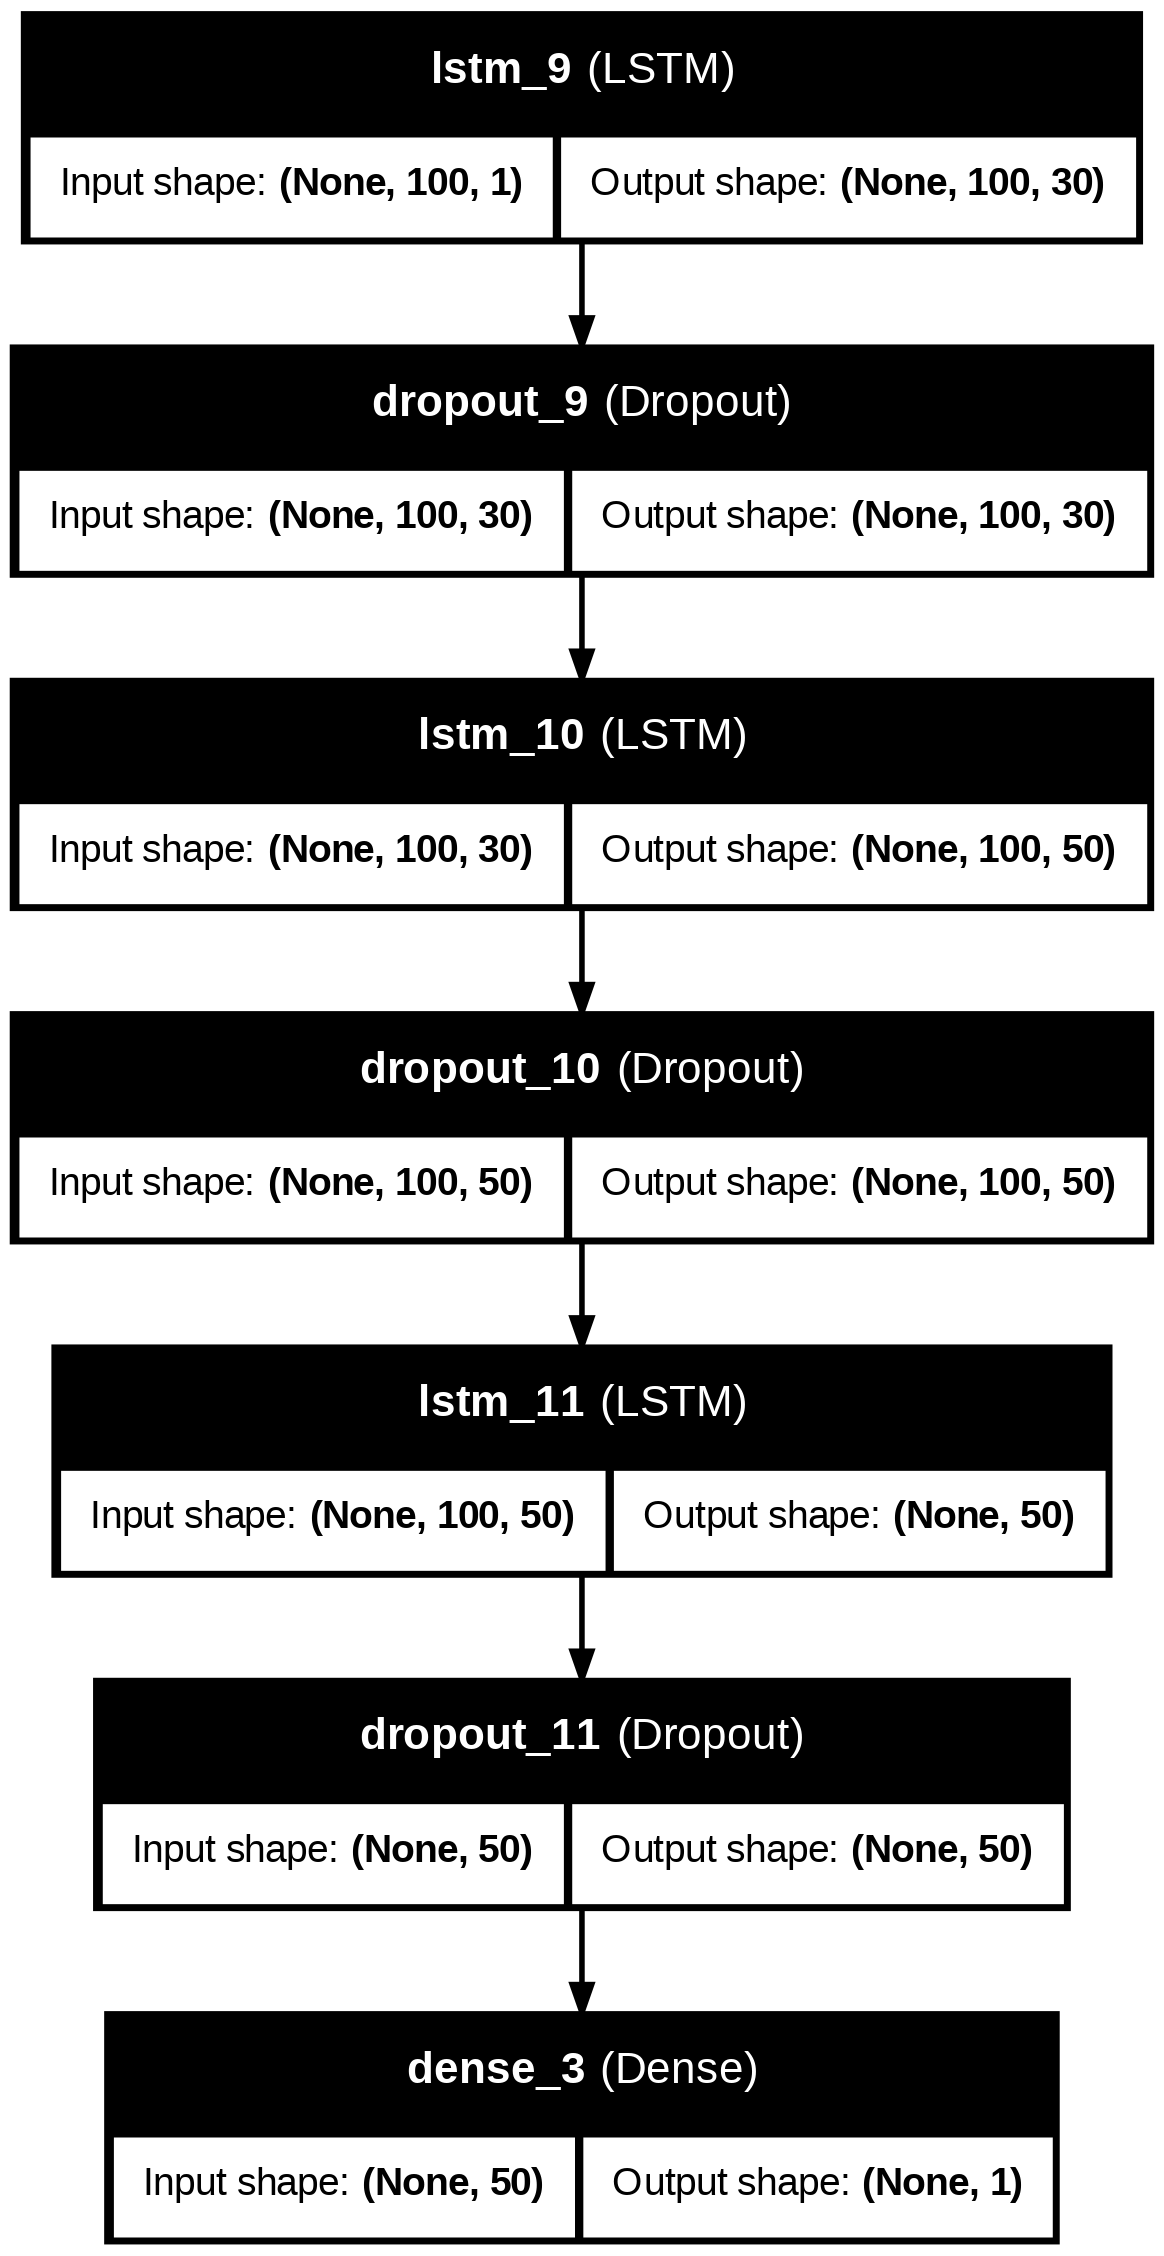

In [ ]:
from tensorflow.keras.utils import plot_model

# Visualize the LSTM model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


# **Test The Model**

In [ ]:
test_start =dt.datetime(2024,1,1)
test_end = dt.datetime(2024,6,30)
test_data = yf.download ('AAPL' , test_start , test_end)
actual_prices = test_data["Close"].values
total_dataset = pd.concat((aapl['Close'], test_data['Close']), axis =0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - pred_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

x_test = []
for x in range (pred_days , len(model_inputs)):
    x_test.append(model_inputs[x-pred_days:x , 0])

x_test = np.array(x_test)
test_data.to_csv("data.csv")

[*********************100%***********************]  1 of 1 completed


# **Actual Vs Predicted Graph**

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step


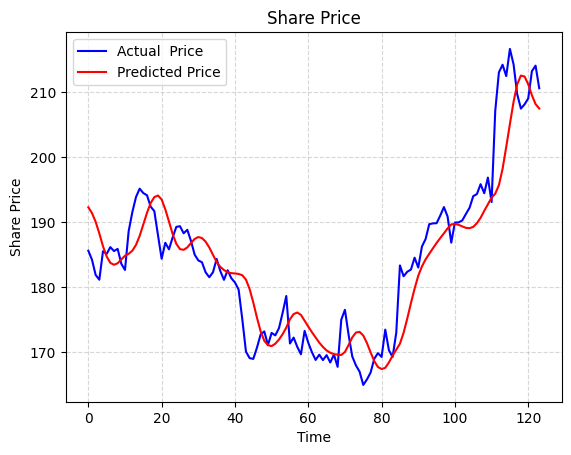

In [ ]:
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
plt.plot(actual_prices, color='Blue', label='Actual  Price')
plt.plot(predicted_prices, color='Red', label='Predicted Price')
#plt.figure(figsize=(10, 5))
plt.title( 'Share Price')
plt.xlabel('Time')
plt.ylabel('Share Price')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.show()

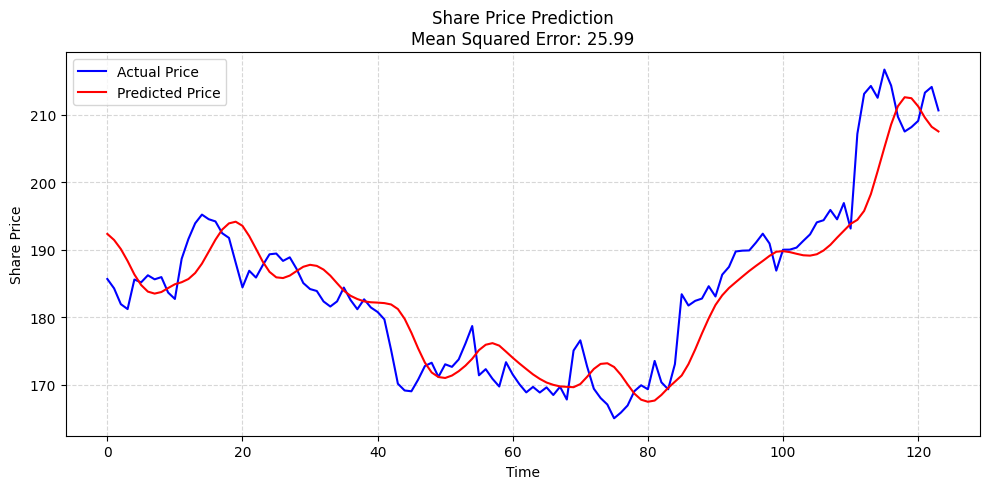

In [ ]:
plt.figure(figsize=(10, 5))
mse = mean_squared_error(actual_prices, predicted_prices)
plt.plot(actual_prices, color='blue', label='Actual Price', linewidth=1.5)
plt.plot(predicted_prices, color='red', label='Predicted Price', linewidth=1.5)
plt.title(f'Share Price Prediction\nMean Squared Error: {mse:.2f}')
plt.xlabel('Time')
plt.ylabel('Share Price')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# **Decision Tree**

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Mean Squared Error: 49.709277320168745


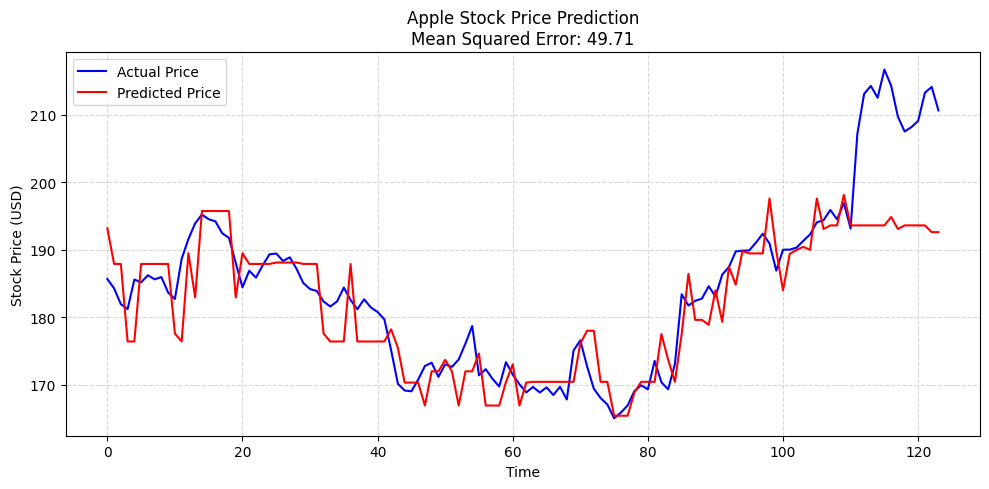

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import datetime as dt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Download Apple stock data
aapl = yf.download('AAPL', start='2015-01-01', end='2023-12-31')

# Normalize data using MinMaxScaler method
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(aapl['Close'].values.reshape(-1, 1))

# Determine days used for prediction
pred_days = 100
x_train = []
y_train = []
for x in range(pred_days, len(scaled_data)):
    x_train.append(scaled_data[x - pred_days:x, 0])
    y_train.append(scaled_data[x, 0])

# Convert to NumPy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Train the decision tree model
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(x_train, y_train)

# Prepare test data
test_start = dt.datetime(2024, 1, 1)
test_end = dt.datetime(2024, 6, 30)
test_data = yf.download('AAPL', test_start, test_end)
actual_prices = test_data["Close"].values
total_dataset = pd.concat((aapl['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - pred_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

x_test = []
for x in range(pred_days, len(model_inputs)):
    x_test.append(model_inputs[x - pred_days:x, 0])

x_test = np.array(x_test)

# Make predictions on test data
predicted_prices = regressor.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))

# Evaluate the model
mse = mean_squared_error(actual_prices, predicted_prices)
print(f'Mean Squared Error: {mse}')

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(actual_prices, color='blue', label='Actual Price', linewidth=1.5)
plt.plot(predicted_prices, color='red', label='Predicted Price', linewidth=1.5)
plt.title(f'Apple Stock Price Prediction\nMean Squared Error: {mse:.2f}')
plt.xlabel('Time')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# **Random Forest Regressor**

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Mean Squared Error: 37.411164528841105


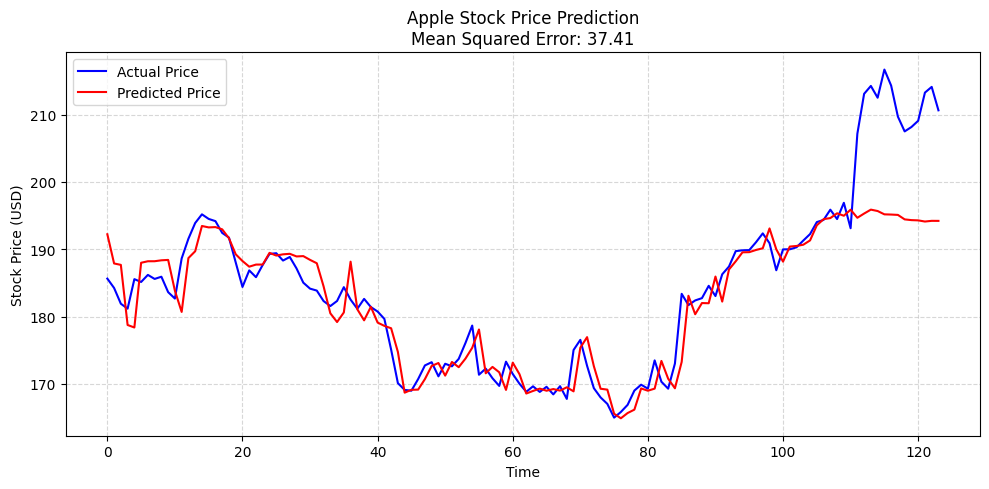

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import datetime as dt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Download Apple stock data
aapl = yf.download('AAPL', start='2015-01-01', end='2023-12-31')

# Normalize data using MinMaxScaler method
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(aapl['Close'].values.reshape(-1, 1))

# Determine days used for prediction
pred_days = 100
x_train = []
y_train = []
for x in range(pred_days, len(scaled_data)):
    x_train.append(scaled_data[x - pred_days:x, 0])
    y_train.append(scaled_data[x, 0])

# Convert to NumPy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Train the random forest model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(x_train, y_train)

# Prepare test data
test_start = dt.datetime(2024, 1, 1)
test_end = dt.datetime(2024, 6, 30)
test_data = yf.download('AAPL', test_start, test_end)
actual_prices = test_data["Close"].values
total_dataset = pd.concat((aapl['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - pred_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

x_test = []
for x in range(pred_days, len(model_inputs)):
    x_test.append(model_inputs[x - pred_days:x, 0])

x_test = np.array(x_test)

# Make predictions on test data
predicted_prices = regressor.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))

# Evaluate the model
mse = mean_squared_error(actual_prices, predicted_prices)
print(f'Mean Squared Error: {mse}')

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(actual_prices, color='blue', label='Actual Price', linewidth=1.5)
plt.plot(predicted_prices, color='red', label='Predicted Price', linewidth=1.5)
plt.title(f'Apple Stock Price Prediction\nMean Squared Error: {mse:.2f}')
plt.xlabel('Time')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
